In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
soal = pd.read_excel('/content/drive/MyDrive/PER-TA-AN DUNIAWI/Data/42-01/Preprocessing.xlsx')
soal

,Question,Label,Casefold,Tokenize,FreqDist,Stopwords,Stemmed
0,Aktor yang bertanggung jawab atas analisis pre...,C1,aktor yang bertanggung jawab atas analisis pre...,"['aktor', 'yang', 'bertanggung', 'jawab', 'ata...",<FreqDist with 16 samples and 18 outcomes>,"['aktor', 'bertanggung', 'analisis', 'predikti...","['aktor', 'tanggung', 'analisis', 'prediktif',..."
1,Fokusnya terhadap Enterprise/Executive IS adal...,C1,fokusnya terhadap enterprise/executive is adal...,"['fokusnya', 'terhadap', 'enterpriseexecutive'...",<FreqDist with 10 samples and 10 outcomes>,"['fokusnya', 'enterpriseexecutive', 'is', 'sej...","['fokus', 'enterpriseexecutive', 'is', 'sejara..."
2,Sistem pemrosesan transaksi yang secara konsta...,C1,sistem pemrosesan transaksi yang secara konsta...,"['sistem', 'pemrosesan', 'transaksi', 'yang', ...",<FreqDist with 14 samples and 14 outcomes>,"['sistem', 'pemrosesan', 'transaksi', 'konstan...","['sistem', 'pemrosesan', 'transaksi', 'konstan..."
3,Komponen yang dikembangkan oleh Gartner dalam ...,C3,komponen yang dikembangkan oleh gartner dalam ...,"['komponen', 'yang', 'dikembangkan', 'oleh', '...",<FreqDist with 12 samples and 12 outcomes>,"['komponen', 'dikembangkan', 'gartner', 'mengu...","['komponen', 'kembang', 'gartner', 'urai', 're..."
4,Fokus utama pengembangan sistem informasi adal...,C1,fokus utama pengembangan sistem informasi adal...,"['fokus', 'utama', 'pengembangan', 'sistem', '...",<FreqDist with 20 samples and 24 outcomes>,"['fokus', 'utama', 'pengembangan', 'sistem', '...","['fokus', 'utama', 'kembang', 'sistem', 'infor..."
...,...,...,...,...,...,...,...
156,"Dalam three-tier arsitektur data warehouse, ti...",C1,"dalam three-tier arsitektur data warehouse, ti...","['dalam', 'threetier', 'arsitektur', 'data', '...",<FreqDist with 8 samples and 8 outcomes>,"['threetier', 'arsitektur', 'data', 'warehouse...","['threetier', 'arsitektur', 'data', 'warehouse..."
157,Berikut keuntungan data warehouse kecuali...,C3,berikut keuntungan data warehouse kecuali...,"['berikut', 'keuntungan', 'data', 'warehouse',...",<FreqDist with 5 samples and 5 outcomes>,"['keuntungan', 'data', 'warehouse', 'kecuali']","['untung', 'data', 'warehouse', 'kecuali']"
158,classification technique yang teknik pembelaja...,C1,classification technique yang teknik pembelaja...,"['classification', 'technique', 'yang', 'tekni...",<FreqDist with 15 samples and 16 outcomes>,"['classification', 'technique', 'teknik', 'pem...","['classification', 'technique', 'teknik', 'aja..."
159,Hadoop adalah kerangka kerja sumber terbuka un...,C1,hadoop adalah kerangka kerja sumber terbuka un...,"['hadoop', 'adalah', 'kerangka', 'kerja', 'sum...",<FreqDist with 17 samples and 18 outcomes>,"['hadoop', 'kerangka', 'kerja', 'sumber', 'ter...","['hadoop', 'kerangka', 'kerja', 'sumber', 'buk..."


In [ ]:
soal['Label'].value_counts()

C1    114
C3     38
C2      9
Name: Label, dtype: int64

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [ ]:
x = soal['Stemmed'].values
y = soal['Label'].values

In [ ]:
print(x)

["['aktor', 'tanggung', 'analisis', 'prediktif', 'analisis', 'statistik', 'tools', 'analitik', 'canggih', 'algoritmanya']"
 "['fokus', 'enterpriseexecutive', 'is', 'sejarah', 'business', 'inteligent']"
 "['sistem', 'pemrosesan', 'transaksi', 'konstan', 'libat', 'tangan', 'baru', 'basis', 'data', 'operasional']"
 "['komponen', 'kembang', 'gartner', 'urai', 'rencana', 'laksana', 'bi', 'kecuali']"
 "['fokus', 'utama', 'kembang', 'sistem', 'informasi', 'dukung', 'ambil', 'putus', 'fokus', 'sedia', 'lapor', 'struktur', 'kala', 'sejarah', 'business', 'intelligent']"
 "['csf', 'business', 'intelligent']"
 "['csf', 'business', 'intelligence', 'harus', 'cepat', 'terima', 'ubah', 'adaptasi', 'erti']"
 "['sistem', 'dukung', 'putus', 'dss', 'gabung', 'sumber', 'daya', 'intelektual', 'individu', 'mampu', 'komputer', 'tingkat', 'kualitas', 'putus', 'kembang', 'business', 'intelligent']"
 "['type', 'of', 'business', 'analytics']"
 "['istilah', 'tools', 'monitoring', 'analisis', 'kerja']"
 "['istilah'

In [ ]:
LE = LabelEncoder()
y_le = LE.fit_transform(y)

In [ ]:
tfidf = TfidfVectorizer()
x_tf = tfidf.fit_transform(x)

print('Feature Names: ', tfidf.get_feature_names())
print('Penilaian dari TF-IDF:', x_tf)
print('Mapping dari Feature Names ke Penilaian:', tfidf.vocabulary_)

x_tf = x_tf.toarray()

Feature Names:  ['abstraction', 'acu', 'ad', 'adaptasi', 'ajar', 'akses', 'aktor', 'akurat', 'alami', 'alat', 'algoritma', 'algoritmanya', 'alternatif', 'aman', 'ambil', 'analis', 'analisis', 'analitik', 'analitis', 'analytic', 'analytical', 'analytics', 'and', 'anggap', 'angka', 'apa', 'aplikasi', 'application', 'approach', 'architecture', 'area', 'arena', 'arsitektur', 'artefak', 'aspek', 'assessing', 'association', 'atribut', 'atur', 'audiens', 'bagan', 'bagi', 'balanced', 'banding', 'bangun', 'banyak', 'barangbarang', 'baru', 'bas', 'baseline', 'basic', 'basis', 'batas', 'bawa', 'beda', 'beli', 'benar', 'bentuk', 'berisik', 'bersih', 'bertahuntahun', 'bi', 'biaya', 'big', 'bilah', 'bilang', 'bisnis', 'bpm', 'bsc', 'bspecialized', 'buat', 'buka', 'buruk', 'business', 'butuh', 'canggih', 'capai', 'categorical', 'categories', 'category', 'centrality', 'centralized', 'cepat', 'cerita', 'chain', 'challange', 'chart', 'charts', 'ciri', 'class', 'classification', 'closedloop', 'cocok', 'c

In [ ]:
print(Counter(y))
print("------------")

#define oversampling strategy
oversample = SMOTE()

#fit and apply the transform
x_over, y_over = oversample.fit_resample(x_tf, y_le)

#summarize class distribution
print("------------")
print(Counter(y_over))

Counter({'C1': 114, 'C3': 38, 'C2': 9})
------------
------------
Counter({0: 114, 2: 114, 1: 114})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_over)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(y_over)

[0 0 0 2 0 2 0 0 2 0 0 2 1 2 2 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2
 2 0 2 0 0 2 0 2 2 1 0 0 1 2 0 1 0 1 2 2 1 0 2 0 2 2 2 0 0 2 2 0 1 2 2 2 2
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 1 0 2 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


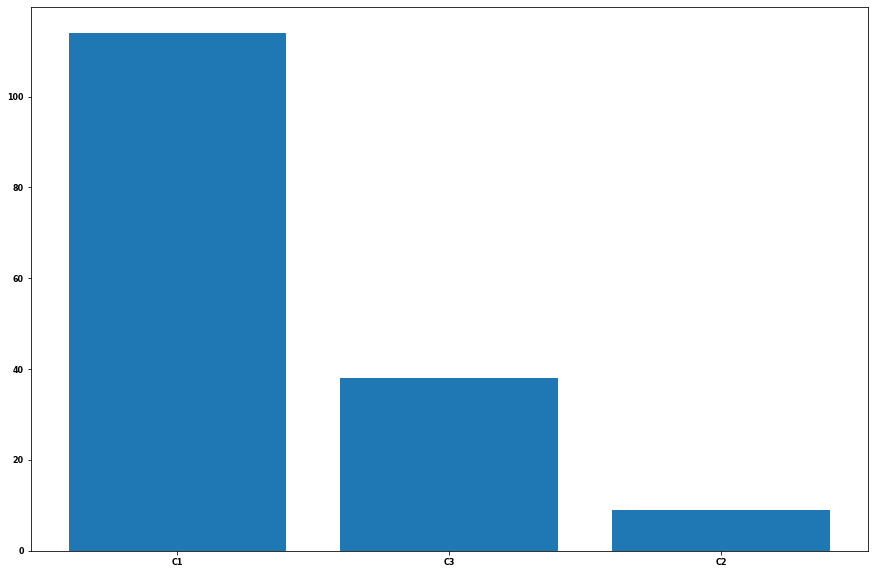

In [ ]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
w = collections.Counter(y)
plt.figure(figsize=(15,10))
plt.bar(w.keys(), w.values())
plt.savefig('/content/drive/MyDrive/PER-TA-AN DUNIAWI/sebelum2.png')
plt.show()

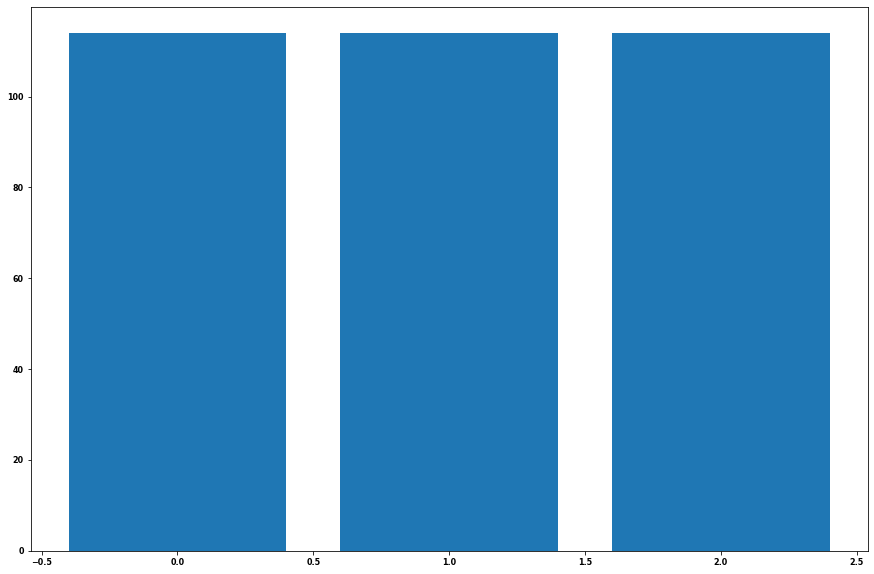

In [ ]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
w = collections.Counter(y_over)
plt.figure(figsize=(15,10))
plt.bar(w.keys(), w.values())
plt.savefig('/content/drive/MyDrive/PER-TA-AN DUNIAWI/sesudah2.png')
plt.show()

In [ ]:
#xtrain, xtest, ytrain, ytest = train_test_split(x_over, y_over, test_size = 0.3)

KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


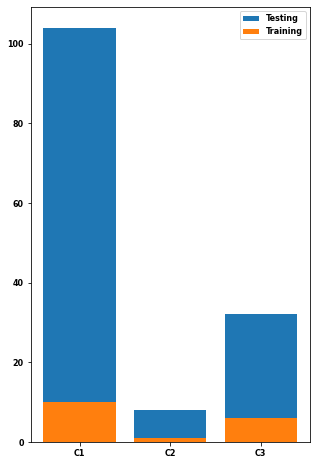

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160] TEST: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32]


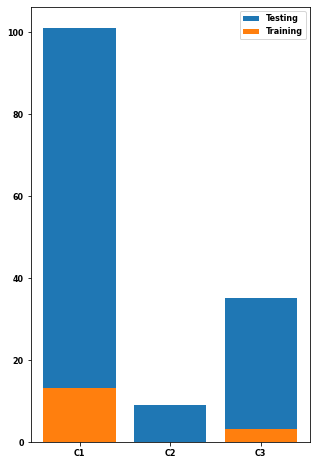

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160] TEST: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


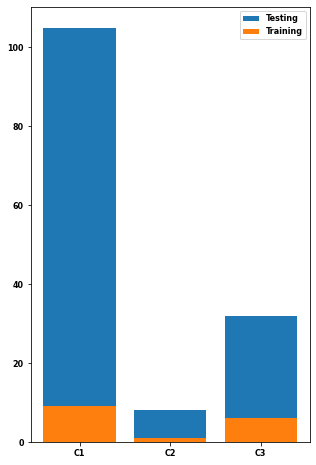

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160] TEST: [49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


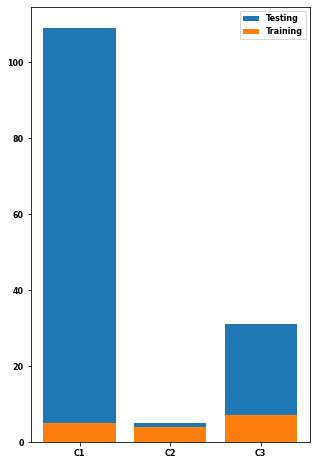

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160] TEST: [65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]


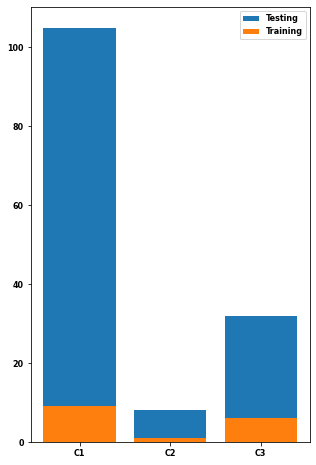

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160] TEST: [81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96]


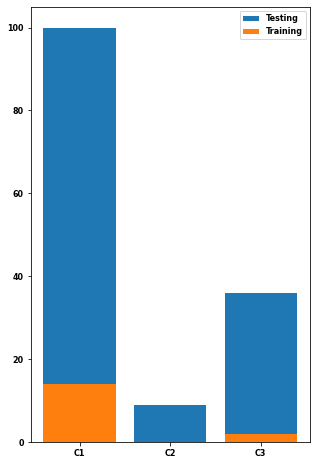

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160] TEST: [ 97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112]


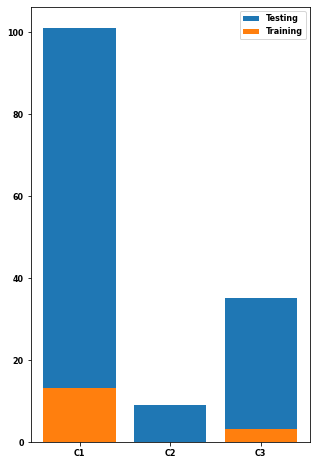

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160] TEST: [113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128]


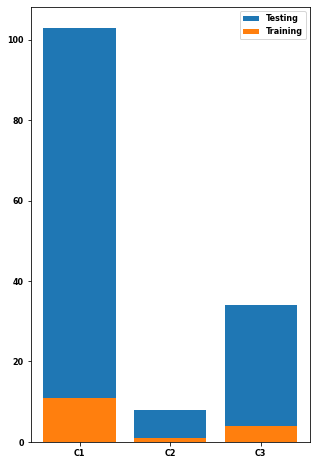

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160] TEST: [129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144]


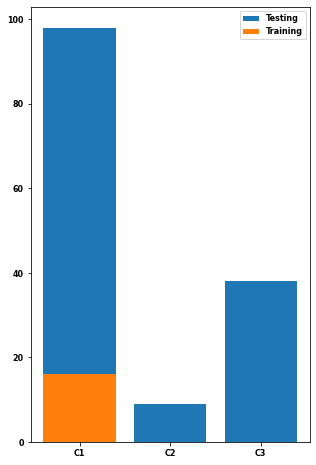

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144] TEST: [145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160]


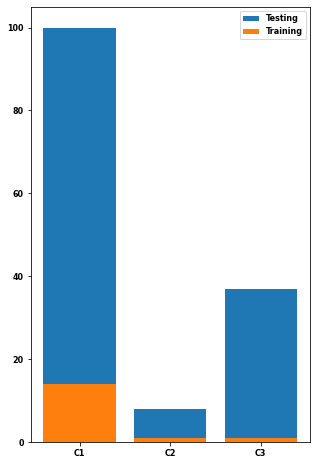

In [ ]:
#seeblum smote
import numpy as np
from sklearn.model_selection import KFold
X = x_tf
y = y_le
kf = KFold(n_splits=10)
kf.get_n_splits(X)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}
print(kf)
KFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X):
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     print("TRAIN:", train_index, "TEST:", test_index)
     plt.rc('font', **font)
     w = collections.Counter(y_train)
     z = collections.Counter(y_test)
     plt.figure(figsize=(5,8))
     plt.bar(w.keys(), w.values())
     plt.bar(z.keys(), z.values())
     plt.xticks([1, 0, 2], ['C2', 'C1', 'C3'])
     plt.legend(['Testing', 'Training'], loc='upper right')
     plt.show()

In [ ]:
pipeline_nb = Pipeline([  
    ('tfidf', TfidfTransformer()),  
    ('classifier', naive_bayes.MultinomialNB()),  
])

In [ ]:
pipeline_nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
prediction_nb = pipeline_nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, prediction_nb)))

Model accuracy score: 0.8750


In [ ]:
pipeline_svm = Pipeline([  
    ('tfidf', TfidfTransformer()),  
    ('classifier', svm.SVC()),  
])

In [ ]:
pipeline_svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
prediction_svm = pipeline_svm.predict(X_test)

KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266

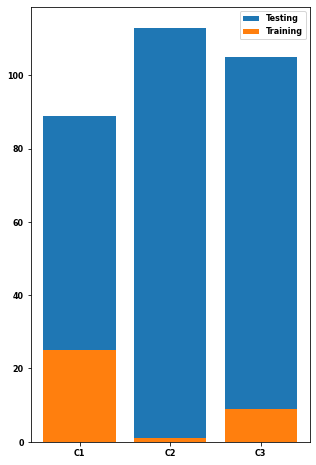

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279

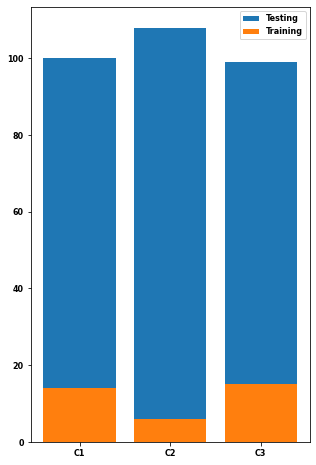

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278

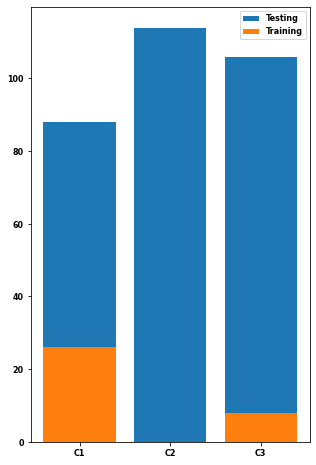

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278

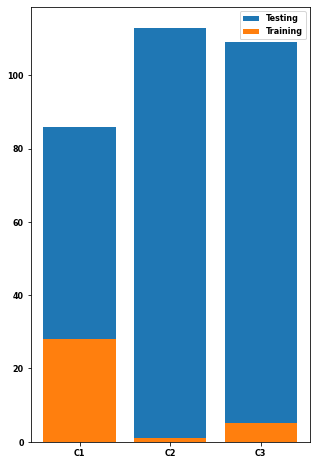

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278

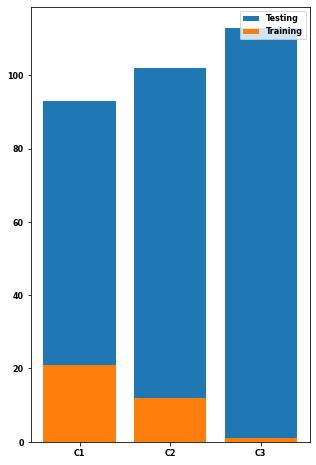

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278

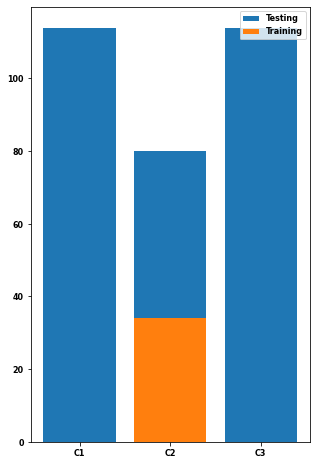

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278

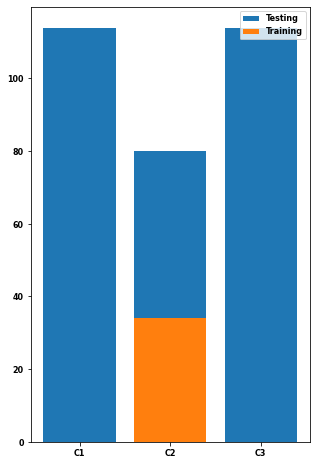

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 274 275 276 277 278

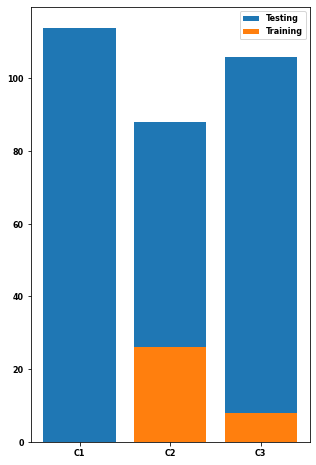

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

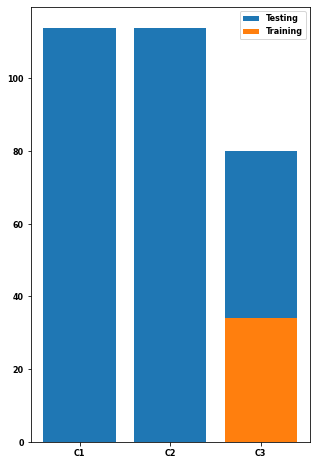

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

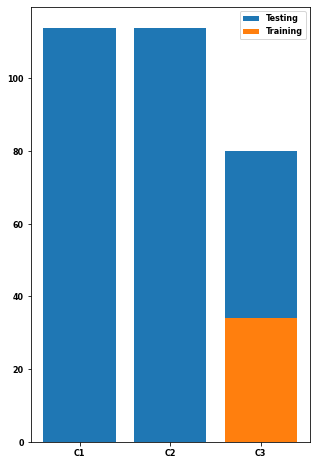

In [ ]:
#setelah smote
import numpy as np
from sklearn.model_selection import KFold
X = x_over
y = y_over
kf = KFold(n_splits=10) #k=2 utk testing dan training
kf.get_n_splits(X)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}
print(kf)
KFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X):
     X_train_smote, X_test_smote = X[train_index], X[test_index]
     y_train_smote, y_test_smote = y[train_index], y[test_index]
     print("TRAIN:", train_index, "TEST:", test_index)
     plt.rc('font', **font)
     w = collections.Counter(y_train_smote)
     z = collections.Counter(y_test_smote)
     plt.figure(figsize=(5,8))
     plt.bar(w.keys(), w.values())
     plt.bar(z.keys(), z.values())
     plt.xticks([1, 0, 2], ['C2', 'C1', 'C3'])
     plt.legend(['Testing', 'Training'], loc='upper right')
     plt.show()